# IMPORTING RELEVANT LIBRARY

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
%matplotlib inline

# IMPORTING DATA

In [2]:
train = pd.read_csv('loan_train.csv')
train.head()
test = pd.read_csv('loan_test.csv')

In [3]:
train_id= pd.read_csv('loan_train.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [8]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
train.head(200)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# DATA CLEANING

train['Gender'].fillna(train['Gender'].mean, inplace=True)
train.isna().sum()

values = Train['Gender'].mean()
train['Gender'].fillna(values=values, inplace=True) 

In [10]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)

In [11]:
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)

In [12]:
train['Dependents'].fillna(method='bfill', inplace=True)
test['Dependents'].fillna(method='bfill', inplace=True)

In [13]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)

In [14]:
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mean(), inplace=True)

In [15]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(), inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean(), inplace=True)

In [16]:
train['Credit_History'].fillna(train['Credit_History'].mean(), inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mean(), inplace=True)

In [17]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [19]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [20]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [21]:
testloanID = test.iloc[:,0:1]
testloanID.head()

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051


In [22]:
x = train.iloc[:,1:12]
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.000000,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.000000,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.000000,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.000000,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.000000,Urban
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.000000,Urban
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.000000,Urban
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.000000,Semiurban
8,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.000000,Urban
9,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.000000,Semiurban


In [23]:
y = train.iloc[:,12:13]
y.head()

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y


In [24]:
le = LabelEncoder()
y= le.fit_transform(y)
columns= ['Loan_Status']
y=pd.DataFrame(data=y, columns=columns)
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [25]:
x.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.000000,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.000000,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.000000,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.000000,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.000000,Urban
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.000000,Urban
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.000000,Urban
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.000000,Semiurban
8,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.000000,Urban
9,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.000000,Semiurban


In [26]:
dummies = pd.get_dummies(x, columns = ['Gender', 'Married', 'Dependents','Self_Employed', 'Education', 'Property_Area'], drop_first = True)

In [27]:
dummies.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,0,1,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1


In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
MMS = MinMaxScaler()
S_dummies = MMS.fit_transform(dummies)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(S_dummies,y, test_size=0.3, random_state=0)

In [31]:
x_train

array([[0.10636982, 0.1000072 , 0.43270622, ..., 0.        , 0.        ,
        0.        ],
       [0.04587508, 0.07919937, 0.19247467, ..., 0.        , 0.        ,
        0.        ],
       [0.02782931, 0.05200758, 0.15340087, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.06205318, 0.07600739, 0.276411  , ..., 0.        , 1.        ,
        0.        ],
       [0.07276438, 0.        , 0.21852388, ..., 1.        , 0.        ,
        1.        ],
       [0.04984539, 0.05534356, 0.25036179, ..., 0.        , 1.        ,
        0.        ]])

In [32]:
x_test

array([[0.08577613, 0.        , 0.10853835, ..., 0.        , 1.        ,
        0.        ],
       [0.05046382, 0.        , 0.14905933, ..., 0.        , 1.        ,
        0.        ],
       [0.07400124, 0.09374325, 0.45586107, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.03730365, 0.        , 0.03907381, ..., 0.        , 1.        ,
        0.        ],
       [0.03834261, 0.        , 0.23299566, ..., 0.        , 0.        ,
        0.        ],
       [0.05868893, 0.        , 0.13458755, ..., 0.        , 1.        ,
        0.        ]])

In [33]:
y_train.head()

,Loan_Status
351,0
593,1
320,1
186,0
557,1


In [34]:
y_test.head()

,Loan_Status
454,1
52,0
536,1
469,0
55,1


# ROUGH CHECK OF BEST MODEL FIT

In [35]:
# Spot Check Algorithms
models = []
#models.append(('LinearR',LinearRegression()))
models.append(('LR', LogisticRegression(multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits = 10, random_state=42)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.799376 (0.039702)
LDA: 0.801757 (0.040934)
KNN: 0.729593 (0.050669)
CART: 0.687670 (0.041831)
NB: 0.787964 (0.037697)
SVM: 0.801757 (0.039525)


LR: 0.797121 (0.058265)
LDA: 0.804153 (0.051320)
KNN: 0.734275 (0.037680)
DTC: 0.713344 (0.038552)
GNB: 0.787874 (0.045867)
SVM: 0.801772 (0.052655)
RF: 0.738926 (0.052805)


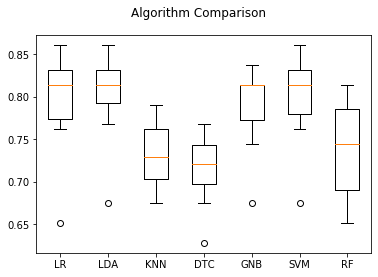

In [36]:
# Compare Algorithms

from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# prepare models

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

# evaluate each model in turn

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
plt.savefig ('Algorithm Comparison')
pyplot.show()

# REAL MODELS DESIGN TRYOUTS

# LOGISTIC REGRESSION

In [37]:
model = LogisticRegression()
model.fit(x_train, y_train)
ypred = model.predict(x_test)
ypred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [38]:
y_test['Loan_Status'].value_counts()

1    134
0     51
Name: Loan_Status, dtype: int64

[[ 21  30]
 [  2 132]]


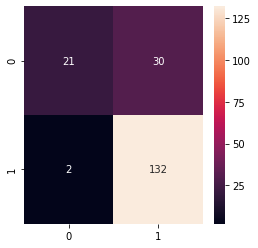

In [39]:
cm = confusion_matrix(y_test, ypred)
print(cm)
fig, ax = plt.subplots(figsize=(4,4))
fig = sns.heatmap(cm, annot = True, fmt = 'd');

In [40]:
AC = accuracy_score(y_test, ypred)
AC * 100

82.70270270270271

# SUPPORT VECTOR REGRESSION

In [41]:
#SVC
from sklearn import svm
reg = svm.LinearSVC(random_state = 20)

In [42]:
reg.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=20, tol=0.0001,
          verbose=0)

In [43]:
S_pred = reg.predict(x_test)

[[ 22  29]
 [  2 132]]


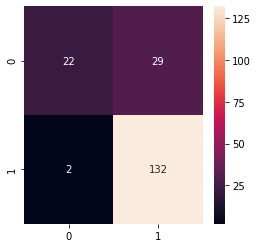

In [44]:
cm = confusion_matrix(y_test, S_pred)
print(cm)
fig, ax = plt.subplots(figsize=(4,4))
fig = sns.heatmap(cm, annot = True, fmt = 'd');

In [45]:
AC = accuracy_score(y_test, S_pred)
AC * 100

83.24324324324324

# APPLICATION MODEL ON TEST DATASET

In [46]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban


In [47]:
Ntest = test.iloc[:,1:12]
Ntest.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban


In [48]:
tdummies = pd.get_dummies(Ntest, columns = ['Gender', 'Married', 'Dependents','Self_Employed', 'Education', 'Property_Area'], drop_first = True)
tdummies.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.000000,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.000000,1,1,1,0,0,0,0,0,1
2,5000,1800,208.0,360.0,1.000000,1,1,0,1,0,0,0,0,1
3,2340,2546,100.0,360.0,0.825444,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,360.0,1.000000,1,0,0,0,0,0,1,0,1


In [49]:
tdummies = pd.DataFrame(tdummies)
tdummies.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.000000,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.000000,1,1,1,0,0,0,0,0,1
2,5000,1800,208.0,360.0,1.000000,1,1,0,1,0,0,0,0,1
3,2340,2546,100.0,360.0,0.825444,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,360.0,1.000000,1,0,0,0,0,0,1,0,1


In [50]:
MMS = MinMaxScaler()
t_dummies = MMS.fit_transform(tdummies)

In [51]:
Tpred = model.predict(t_dummies)
Tpred 

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [52]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



In [53]:
Tpred = pd.DataFrame(np.array(Tpred), columns=['Loan_Status'])
Tpred.head()

,Loan_Status
0,1
1,1
2,1
3,1
4,1


In [54]:
testloanID.head()

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051


In [55]:
result = pd.concat([testloanID, Tpred], axis = 1)
result.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [56]:
result['Loan_Status']= result['Loan_Status'].replace([1],'Approved')
result['Loan_Status']= result['Loan_Status'].replace([0],'Declined')
result.head()

,Loan_ID,Loan_Status
0,LP001015,Approved
1,LP001022,Approved
2,LP001031,Approved
3,LP001035,Approved
4,LP001051,Approved


In [57]:
result['Loan_Status'].value_counts()

Approved    307
Declined     60
Name: Loan_Status, dtype: int64

# SOME VISUALIZATIONS

[0.16867514 0.11340915 0.17991091 0.05059565 0.28489596 0.02460818
 0.02943519 0.02463444 0.01993881 0.01603261 0.02942307 0.01788245
 0.02066708 0.01989134]


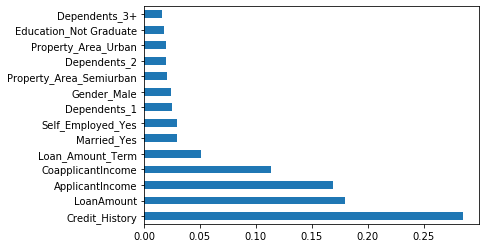

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(S_dummies,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=dummies.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

The percentage of Declined Loan : 16.0
The percentage of Approved Loan : 84.0


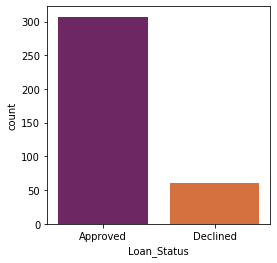

In [68]:
# let's look at the target percentage

plt.figure(figsize=(4,4))
sns.set_palette('GnBu_d')
sns.countplot(result['Loan_Status'], palette='inferno');

print('The percentage of Declined Loan :', round((result['Loan_Status'].value_counts()['Declined'] / len(result))*100))
print('The percentage of Approved Loan :', round((result['Loan_Status'].value_counts()['Approved'] / len(result))*100))

The percentage of Declined Loan Application : 16.0
The percentage of Approved Loan Application : 84.0


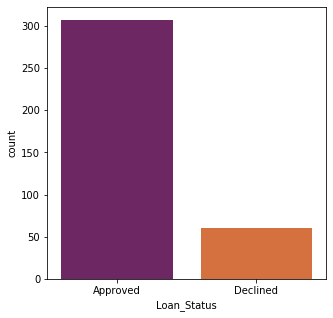

In [60]:
# let's look at the target percentage

plt.figure(figsize=(5,5))
sns.set_palette('GnBu_d')
sns.countplot(result['Loan_Status'], palette='inferno');

print('The percentage of Declined Loan Application :', round((result['Loan_Status'].value_counts()['Declined'] / len(result))*100))
print('The percentage of Approved Loan Application :', round((result['Loan_Status'].value_counts()['Approved'] / len(result))*100))

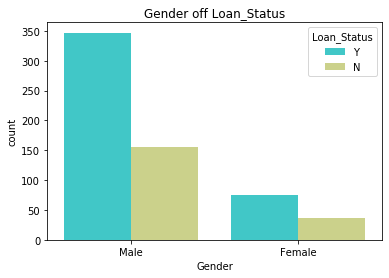

In [61]:
sns.countplot(x='Gender', data=train, hue='Loan_Status', palette='rainbow')
plt.title("Gender off Loan_Status")
plt.savefig('Gender.png', dpi=300, bbox_inches="tight")
plt.show();

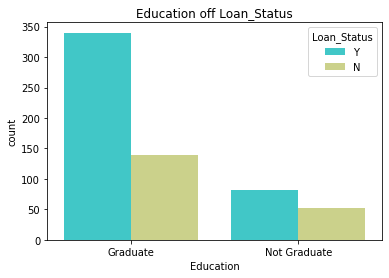

In [62]:
sns.countplot(x='Education', data=train, hue='Loan_Status', palette='rainbow')
plt.title("Education off Loan_Status")
plt.savefig('Education.png', dpi=300, bbox_inches="tight")
plt.show;

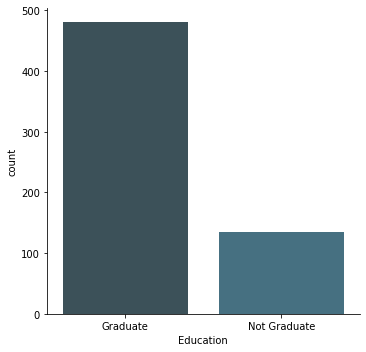

In [63]:
sns.catplot(x = 'Education', kind = 'count', data = train)

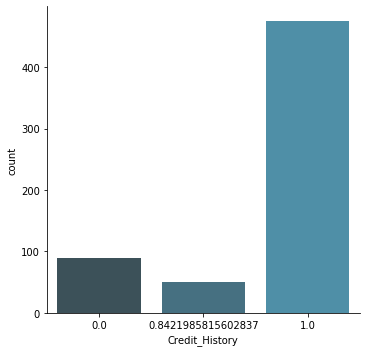

In [64]:
sns.catplot(x = 'Credit_History', kind = 'count', data = train)

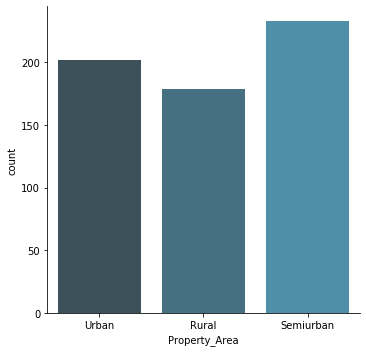

In [65]:
sns.catplot(x = 'Property_Area', kind = 'count', data = train)

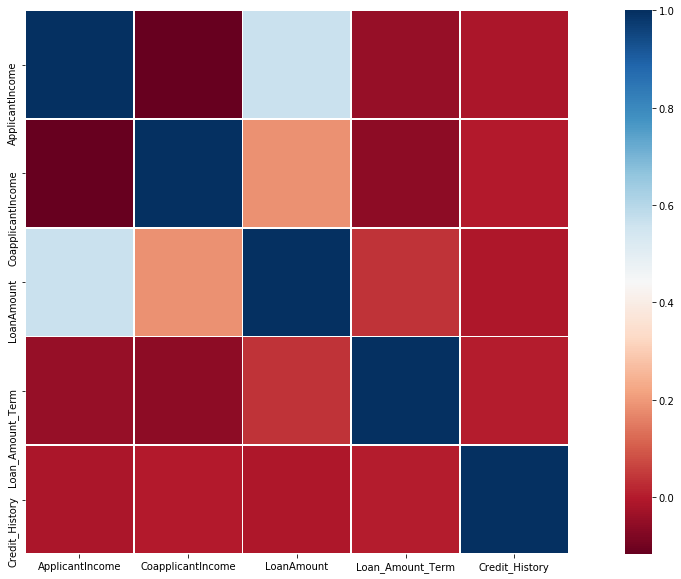

In [66]:
corrmat = train.corr()
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(corrmat, square = True, linewidth = 0.8, cmap = 'RdBu')

le = LabelEncoder()
x['Gender'] = le.fit_transform(x['Gender'])
test['Gender'] = le.fit_transform(test['Gender'])
x['Married'] = le.fit_transform(x['Married'])
test['Married'] = le.fit_transform(test['Married'])
x['Education'] = le.fit_transform(x['Education'])
test['Education'] = le.fit_transform(test['Education'])
x['Self_Employed'] = le.fit_transform(x['Self_Employed'])
test['Self_Employed'] = le.fit_transform(test['Self_Employed'])
x['Property_Area'] = le.fit_transform(x['Property_Area'])
test['Property_Area'] = le.fit_transform(test['Property_Area'])
y= le.fit_transform(y)

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Tdummies,pred)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Tdummies.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()